<a href="https://colab.research.google.com/github/leandrohbar/colab_projects/blob/main/Analise_exploratoria_vendas_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Importing Data Using Pandas

# Import the 'avalia' DataFrame from the CSV file 'avaliação AMAZON.csv'
aval = pd.read_csv('/content/drive/MyDrive/Arquivos CSV/RATING AMAZON.csv')

# Import the 'dados' DataFrame from the CSV file 'Amazon Data RATING.csv'
dados = pd.read_csv('/content/drive/MyDrive/Arquivos CSV/Amazon Data RATING.csv')

In [ ]:
dados.head()

In [ ]:
dados.info()

In [ ]:
dados.describe()

In [ ]:
# Data Cleaning: Convert Rupia Prices to Numeric Format

# Remove the Rupia symbol '₹' from the 'actual_price' and 'product_price' columns
dados['actual_price'] = dados['actual_price'].str.replace('₹', '')
dados['product_price'] = dados['product_price'].str.replace('₹', '')

# Remove dots ('.') to enable conversion to numeric format
dados['actual_price'] = dados['actual_price'].str.replace('.', '')
dados['product_price'] = dados['product_price'].str.replace('.', '')

# Replace commas (',') with dots ('.') to make the numeric format compatible with Python
dados['actual_price'] = dados['actual_price'].str.replace(',', '.')
dados['product_price'] = dados['product_price'].str.replace(',', '.')

In [ ]:
# Replace Commas with Periods in the 'rating' Column

# Use the 'str.replace()' method to replace commas with periods in the 'rating' column
dados['rating'] = dados['rating'].str.replace(',', '.')

In [ ]:
# Converting String Columns to Float

dados['actual_price'] = pd.to_numeric(dados['actual_price'])
dados['product_price'] = pd.to_numeric(dados['product_price'])
dados['rating'] = pd.to_numeric(dados['rating'])


## Graficos

In [ ]:
# Filtering Data by Rating

# Create a subset 'rating_above_4_5' containing products with a rating above 4.5
rating_above_4_5 = dados[dados['rating'] > 4.5]


In [ ]:
# Counting and Sorting Ratings

# Count the occurrences of each rating value in the 'rating' column
# for products with a rating above 4.5 (rating_above_4_5 DataFrame)
rating_counts = rating_above_4_5['rating'].value_counts()

# Sort the counts by the index (the rating values)
rating_counts = rating_counts.sort_index()


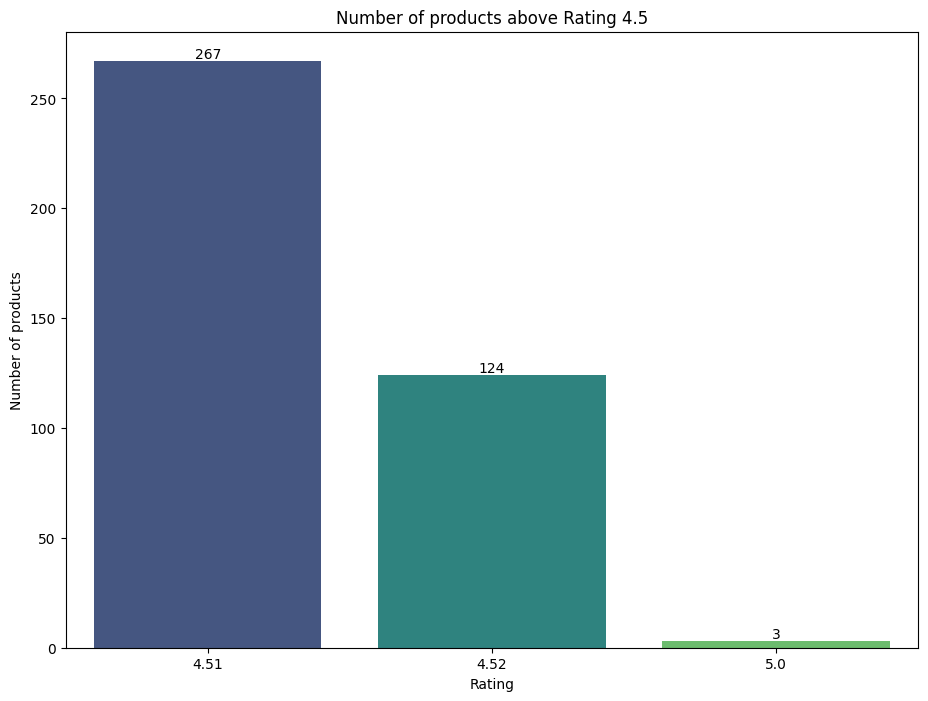

In [ ]:
# Creating a Bar Plot

# Create a figure with a specified size (11 inches by 8 inches)
plt.figure(figsize=(11, 8))

# Create a bar plot using Seaborn's sns.barplot
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

for i, v in enumerate(rating_counts.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

# Add labels to the axes
plt.xlabel('Rating')            # Label for the x-axis
plt.ylabel('Number of products')  # Label for the y-axis

# Add a title to the plot
plt.title('Number of products above Rating 4.5')

# Display the plot
plt.show()


In [ ]:
# Currency Conversion Function

# Define a function 'rupia_para_real' to convert values from rupias to reais
def rupia_para_real(value_in_rupia):
    """
    Converts a value from rupias to reais based on a fixed exchange rate.

    Parameters:
    - value_in_rupia: The value in rupias to be converted.

    Returns:
    - value_in_reais: The converted value in reais.
    """
    actual_exchange_rate = 0.060  # A fixed exchange rate (replace with the actual rate if available)
    value_in_reais = actual_exchange_rate * value_in_rupia
    return value_in_reais

# Apply the 'rupia_para_real' function to convert the 'actual_price' column from rupias to reais
dados['actual_price'] = dados['actual_price'].apply(rupia_para_real)

# Apply the 'rupia_para_real' function to convert the 'product_price' column from rupias to reais
dados['product_price'] = dados['product_price'].apply(rupia_para_real)


In [ ]:
# Filtering Data Based on Price Ranges

# Create a subset 'below_50' containing items with prices less than 50
below_50 = dados[dados['actual_price'] < 50]

# Create a subset 'between_50_500' containing items with prices between 50 and 500
between_50_500 = dados[(dados['actual_price'] > 50) & (dados['actual_price'] < 500)]

# Create a subset 'above_50_500' containing items with prices above 500
above_500 = dados[dados['actual_price'] > 500]


In [ ]:
# Counting the number of items in different price ranges

# Calculate the count of items with a price below 50
price1 = len(below_50['actual_price'])

# Calculate the count of items with a price between 50 and 500
price2 = len(between_50_500['actual_price'])

# Calculate the count of items with a price above 500
price3 = len(above_500['actual_price'])


In [ ]:
# Data
values = [price1, price2, price3] # List of values to be represented in the pie chart
labels = ['Below 50', 'Between 50 and 500', 'Above 500'] # Labels for the pie chart slices
colors = ['#ff9999','#66b3ff','#99ff99'] # Colors for pie chart slices


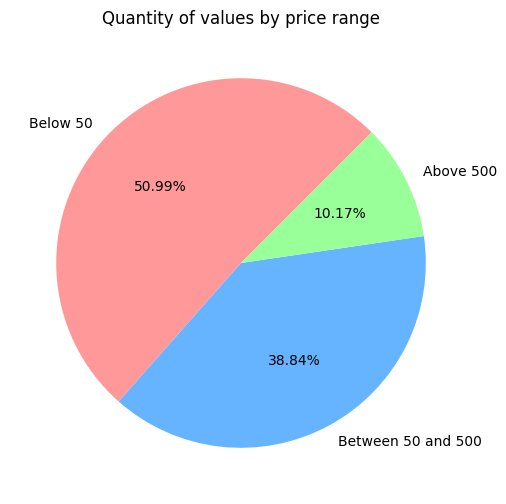

In [ ]:
plt.figure(figsize=(8, 6)) # Create a figure with a specified size (8 inches by 6 inches)

# Create a pie chart
plt.pie(
    values,            # Data values
    labels=labels,     # Labels for the slices
    colors=colors,     # Slice colors
    startangle=45,    # Starting angle of the pie chart (rotated counter-clockwise)
    autopct='%1.2f%%'  # Format for displaying percentages with two decimal places
)
# Add a title to the pie chart
plt.title('Quantity of values by price range')

# Show the pie chart
plt.show()

In [ ]:
aval.head()

In [ ]:
# Merging DataFrames

# Merge two DataFrames, 'dados' and 'aval', based on the 'product_id' column
# using an inner join to include only matching 'product_id' values in both DataFrames
merge_data = pd.merge(dados, aval, on='product_id', how='inner')

In [ ]:
merge_data.head()

In [ ]:
merge_data.info()

In [ ]:
# Splitting Categories Column

# Split the 'category' column by the '|' delimiter and store the result as a list in a new column 'Categories'
merge_data['Categories'] = merge_data['category'].str.split('|', expand=True)[0]
merge_data.head()

In [ ]:
# Extracting and Counting First Categories

# Extract the first category from each list in the 'Categories' column
# Count the occurrences of each first category and sort them by index
categories = merge_data['Categories'].value_counts().sort_index()

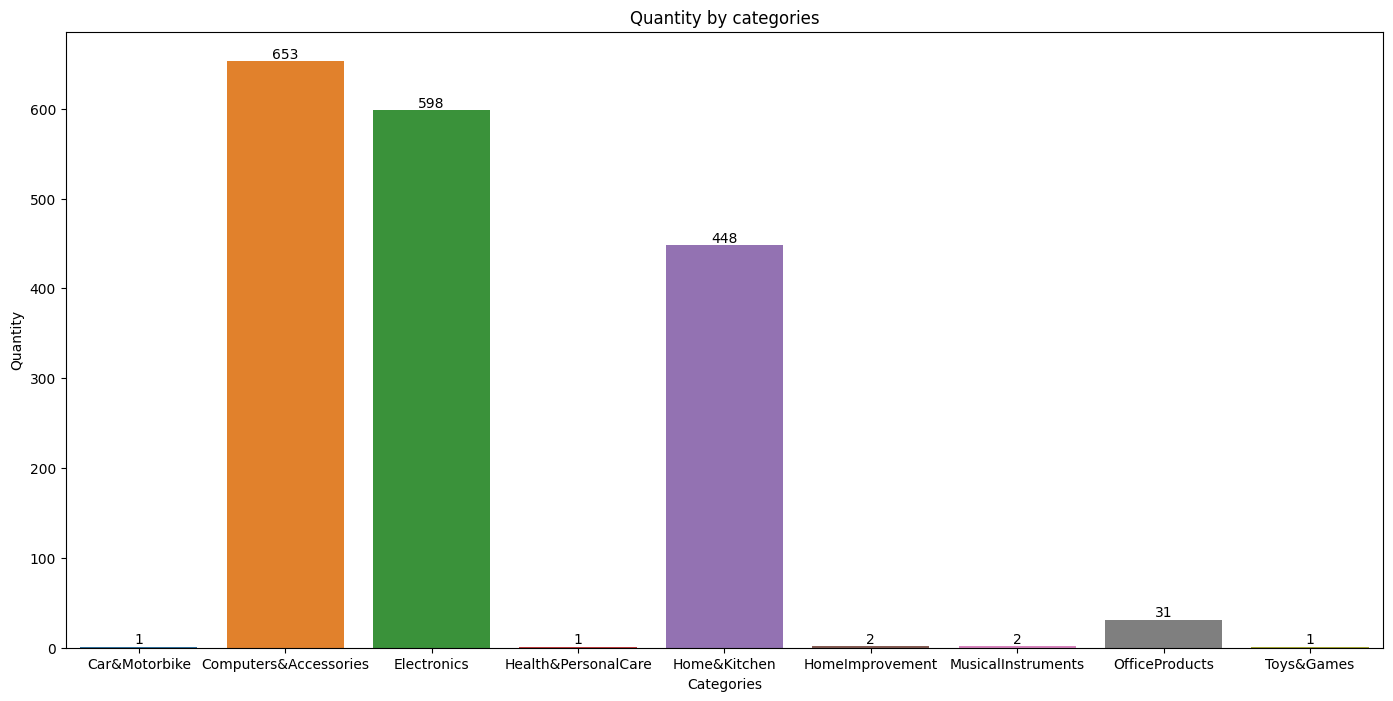

In [ ]:
# Creating a Bar Plot with Value Labels

# Create a figure with a specified size (17 inches by 8 inches)
plt.figure(figsize=(17, 8))

# Create a bar plot using Seaborn with categories on the x-axis and their respective quantities on the y-axis
sns.barplot(x=categories.index, y=categories.values)

# Add value labels to each bar in the bar plot
for i, v in enumerate(categories.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add labels to the x and y axes
plt.xlabel('Categories')  # Label for the x-axis
plt.ylabel('Quantity')     # Label for the y-axis

# Add a title to the plot
plt.title('Quantity by categories')

# Display the plot
plt.show()

In [ ]:
# Calculate and Sort Average Ratings by Category

# Group the data by 'Categories' and calculate the mean rating for each category
categories = merge_data.groupby('Categories')['rating'].mean().reset_index()

# Round the 'rating' column to two decimal places
categories['rating'] = categories['rating'].round(2)

# Sort the categories based on the mean rating in descending order
categories = categories.sort_values(by='rating', ascending=False)


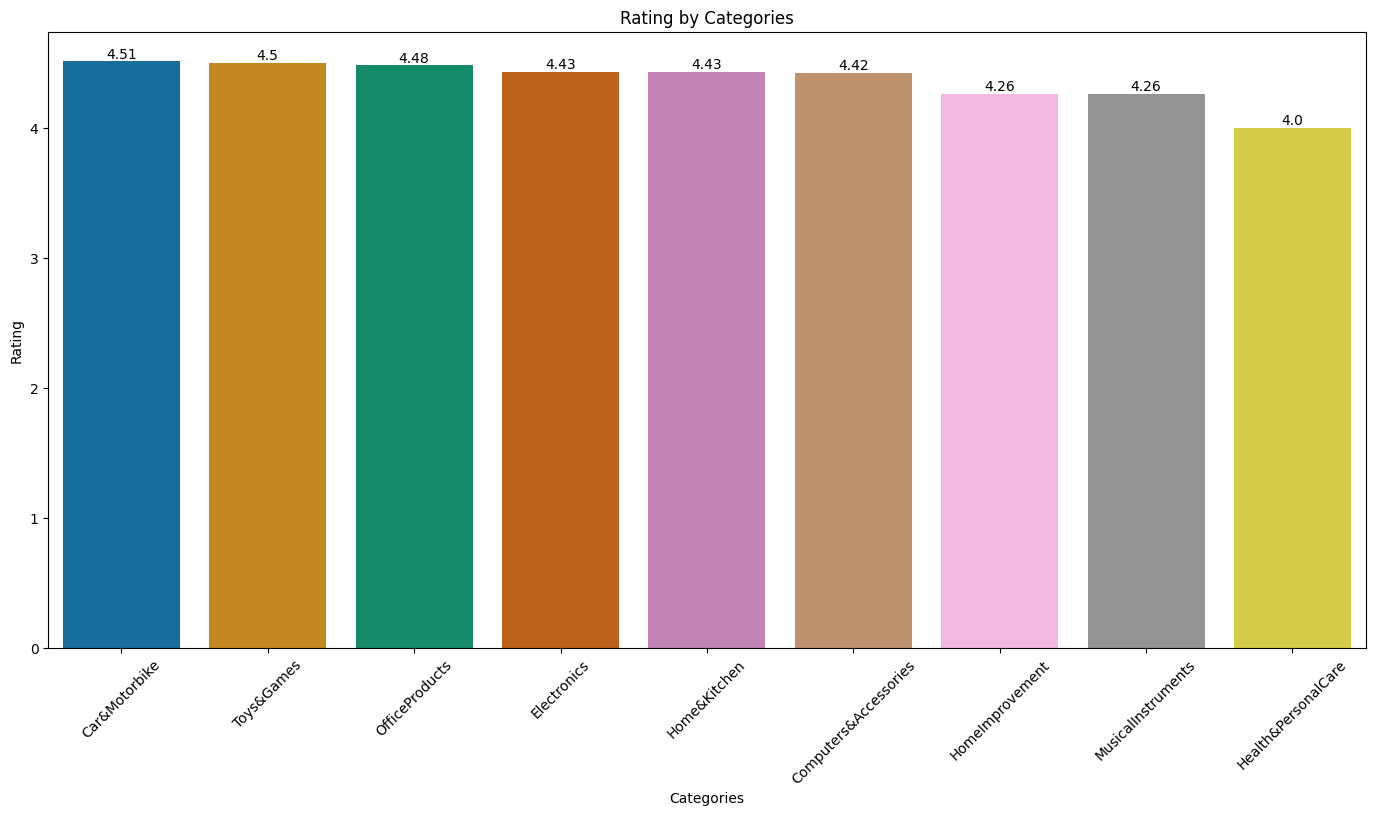

In [ ]:
# Creating a Bar Plot with Value Labels

# Create a figure with a specified size (17 inches by 8 inches)
plt.figure(figsize=(17, 8))

# Create a bar plot using Seaborn with categories on the x-axis and their respective ratings on the y-axis
sns.barplot(x='Categories', y='rating', data=categories, palette='colorblind')

# Add value labels to each bar in the bar plot
for i, v in enumerate(categories['rating']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add labels to the x and y axes
plt.xlabel('Categories')  # Label for the x-axis
plt.ylabel('Rating')      # Label for the y-axis

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title to the plot
plt.title('Rating by Categories')

# Display the plot
plt.show()
